#TP2: Extraction d’information
#Traitement automatique de corpus
#Modification du notebook s1_keywords.ipynb pour extraire uniquement les mots clés relatifs à l´année 1965

Étapes à suivre:
1. Télécharger le corpus "CAMille"."

In [1]:
pip install os


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\aspng\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for os


In [87]:
import os
import re
import unicodedata
from collections import Counter

# Importations pour le traitement du texte et le nuage de mots
import nltk.data
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image

In [88]:
# Définition de la fonction de normalisation essentielle pour s'assurer que les mots avec des accents (é, à, ç)
# sont traités de la même manière que leurs équivalents sans accent (e, a, c) lors du filtrage des stopwords et du comptage des fréquences.
def normalize(s):
    # Convert en minuscules et supprime les espaces blancs inutiles
    s = s.lower().strip()
    # Normalise la chaîne en forme NFKD (décomposition canonique). Cela sépare les caractères de base de leurs signes diacritiques (accents)
    s = unicodedata.normalize('NFKD', s)
    # Filtre pour ne garder que les caractères qui ne sont pas des signes diacritiques et qui sont des lettres ou des chiffres (pour une robustesse accrue)
    return ''.join(c for c in s if not unicodedata.combining(c) and c.isalnum())


2. Choisisir une année : 1965

In [89]:
# Préparation du texte source de 1965
file_path = "C:/Users/aspng/ULB_TAC/tac/data/tmp/1965.txt"
try:
    with open(file_path, "r", encoding="utf-8") as f:
        text_1965 = f.read()
except FileNotFoundError:
    print(f"Erreur: Le fichier {file_path} n'a pas été trouvé.")
    exit()
    
except Exception as e:
    print(f"Erreur lors de la lecture du fichier: {e}")
    exit()


3. Préparation du texte : nettoyage, tokenization, suppression des stop words, lemmatisation pour extraire uniquement les mots
clés relatifs à 1965.

In [90]:
#Tokenisation et nettoyage du texte 
# Utilisation d'une expression régulière pour trouver tous les mots (séquences de lettres)

words = re.findall(r'\b[a-zà-ÿ]+\b', text.lower())

In [91]:
#Ajoute des stopwords de WordCloud (par défaut, mais utile)
stopwords_set.update(STOPWORDS)


In [92]:
# La normalisation de tous les stopwords est l'étape cruciale. Chaque stopword pour qu'il corresponde à la forme normalisée des mots dans le texte (ex: "est" et "êt" normalisés en "est")
# et IL FAUT ajouter également la version normalisée à l'ensemble.
normalized_stopwords_set = {normalize(w) for w in stopwords_set}


In [93]:
# Ajout des formes originales et normalisées à l'ensemble final pour une double vérification
final_stopwords_set = stopwords_set | normalized_stopwords_set


4. Enrichisser de manière itérative la liste de stopwords et génération d´un nuage de
 mots pour l’année 1965.

In [94]:
# Ajout de mots vides supplémentaires comme par exemple les mots très courts ou spécifiques au texte)
final_stopwords_set.update(['', "les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "je", "tu", "il", "elle", 
       "nous", "vous", "ils", "elles", "me", "te", "se", "lui", "leur", "ça", "cela", "ceux"
       , "celles",  "à", "de", "en", "pour", "par", "avec", "sur", "sous", "chez", "sans", 
       "entre", "vers", "dans", "et", "ou", "mais", "donc", "or", "ni", "car", "lorsque", 
       "quand", "puisque", "parce que", "que", "quoique", "avoir", "est", "sont", "été", "avoir"
       , "doit", "peut", "sont", "sera", "rue", "très", "plus", "moins", "aussi", "déjà", 
       "encore", "toujours", "jamais", "souvent", "alors", "a","abord","absolument","afin","ah",
       "ai","aie","aient","aies","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors",
       "anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune",
       "aucuns","aujourd","aujourd'hui","aupres","auquel","aura","aurai","auraient","aurais","aurait","auras",
       "aurez","auriez","aurions","aurons","auront","aussi","autant","autre","autrefois","autrement","autres",
       "autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avez","aviez","avions",
       "avoir","avons","ayant","ayez","ayons","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre",
       "bon","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles",
       "celles-ci","celles-là","celui","celui-ci","celui-là","celà","cent","cependant","certain","certaine",
       "certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque",
       "cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante",
       "cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables",
       "compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja",
       "delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels",
       "dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","devrait","different",
       "differentes","differents","différent","différente","différentes","différents","dire","directe",
       "directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept",
       "dixième","doit","doivent","donc","dont","dos","douze","douzième","dring","droite","du","duquel","durant",
       "dès","début","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles",
       "elles-mêmes","en","encore","enfin","entre","envers","environ","es","essai","est","et","etant","etc",
       "etre","eu","eue","eues","euh","eurent","eus","eusse","eussent","eusses","eussiez","eussions","eut","eux",
       "eux-mêmes","exactement","excepté","extenso","exterieur","eûmes","eût","eûtes","f","fais","faisaient",
       "faisant","fait","faites","façon","feront","fi","flac","floc","fois","font","force","furent","fus","fusse",
       "fussent","fusses","fussiez","fussions","fut","fûmes","fût","fûtes","g","gens","h","ha","haut","hein","hem",
       "hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé",
       "hélas","i","ici","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle",
       "las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme",
       "lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes",
       "merci","mes","mien","mienne","miennes","miens","mille","mince","mine","minimale","moi","moi-meme","moi-même",
       "moindres","moins","mon","mot","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle",
       "naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux",
       "nommés","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nouveaux","nul","néanmoins","nôtre",
       "nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre",
       "ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi",
       "parole","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense",
       "permet","personne","personnes","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","pièce","plein",
       "plouf","plupart","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour",
       "pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres",
       "probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand",
       "quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que",
       "quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi",
       "quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste",
       "restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf",
       "se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","serai",
       "seraient","serais","serait","seras","serez","seriez","serions","serons","seront","ses","seul","seule","seulement",
       "si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soient","sois","soit","soixante",
       "sommes","son","sont","sous","souvent","soyez","soyons","specifique","specifiques","speculatif","stop","strictement",
       "subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","sujet",
       "superpose","sur","surtout","t","ta","tac","tandis","tant","tardive","te","tel","telle","tellement","telles","tels",
       "tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant",
       "toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement",
       "trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais",
       "valeur","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voie","voient","voilà","voire",
       "vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient",
       "étais","était","étant","état","étiez","étions","été","étée","étées","étés","êtes","être","ô"])

In [39]:
#Calcul des fréquences filtrées pour compter les fréquences des mots après normalisation et filtrage.
filtered_frequencies = Counter()

for word in words:
    # Normalisation du mot du texte
    normalized_word = normalize(word)

    # Filtrage : si le mot normalisé est un stopword ou est vide, on l'ignore
    if normalized_word and normalized_word not in final_stopwords_set:
        # Si le mot n'est pas un stopword, on l'ajoute au compteur
        filtered_frequencies[normalized_word] += 1

In [40]:
# Convertir le Counter en dictionnaire pour WordCloud
frequencies_dict = dict(filtered_frequencies)

Nuage de mots généré et sauvegardé à : output\1965_clean.png


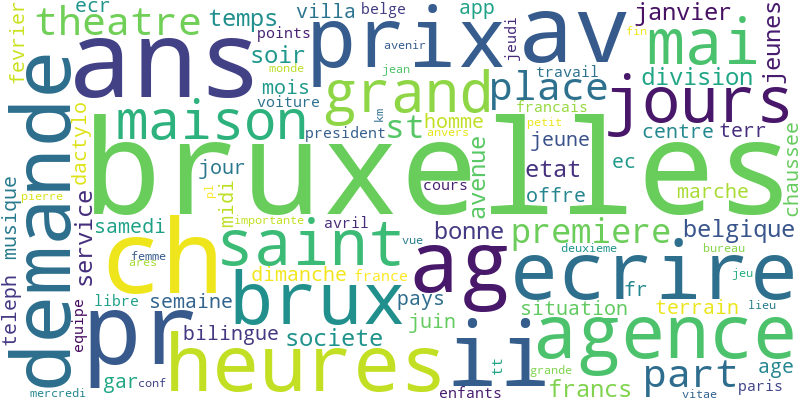

In [42]:
# Définition du chemin de sauvegarde
temp_path = "output"
year = "1965_clean" 


# Crée le dossier de sortie s'il n'existe pas
os.makedirs(temp_path, exist_ok=True)

# Configuration de l'objet WordCloud avec un max_words de 100 comme limite le nombre de mots affichés.
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=100,
    collocations=False # Désactive le regroupement de mots (bigrammes) par défaut
)

# Génération du nuage de mots à partir des fréquences calculées
wordcloud.generate_from_frequencies(frequencies_dict)

#Sauvegarde et affichage du nuage de mots
# Définition du chemin complet du fichier image
path = os.path.join(temp_path, f"{year}.png")

# Sauvegarde du nuage de mots dans un fichier PNG
wordcloud.to_file(path)

print(f"Nuage de mots généré et sauvegardé à : {path}")


# Affichage du nuage de mots en utilisant IPython.display.Image
Image(filename=path)





In [43]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [44]:
absolute_path = r"C:\Temp\1965_clean.txt"

In [45]:
# Charger le texte
n=1000000
text = open("C:/Users/aspng/ULB_TAC/tac/data/tmp/1965.txt", encoding="utf-8").read()[:n]


In [46]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('Bruxelles', np.float64(8.208932296575422e-05)),
 ('Ecrire Agence Rossel', np.float64(0.00011011839079953017)),
 ('Mais', np.float64(0.00014748114868373154)),
 ('Tél', np.float64(0.0001485848484915676)),
 ('rue', np.float64(0.00016390658530337634)),
 ('Rossel', np.float64(0.0002418705461037434)),
 ('l’AGENCE ROSSEL', np.float64(0.0003261248366782347)),
 ('Agence Rossel', np.float64(0.0003261556449508859)),
 ('Van', np.float64(0.0003385107109180237)),
 ('ans', np.float64(0.000344981551708191)),
 ('Bruxelles Tél', np.float64(0.00035133416253833286)),
 ('BROGNIEZ Bruxelles Tél', np.float64(0.0004296798336313172)),
 ('Mai', np.float64(0.0004350074217478132)),
 ('dem', np.float64(0.00047707612194425547)),
 ('Bruxelles JEUNE EMPLOYE', np.float64(0.00047883628687765646)),
 ('d’une', np.float64(0.0005218026158604841)),
 ('d’un', np.float64(0.0005644871454686304)),
 ('FIRME IMPORTANTE Bruxelles', np.float64(0.0006362723727025739)),
 ('c’est', np.float64(0.0006632483600288858)),
 ('Brux', np.f

In [48]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['l’AGENCE ROSSEL',
 'Agence Rossel',
 'Bruxelles Tél',
 'rue Royale',
 'Faire offre',
 'New York',
 'Bruxelles demande',
 'Bruxelles engage']

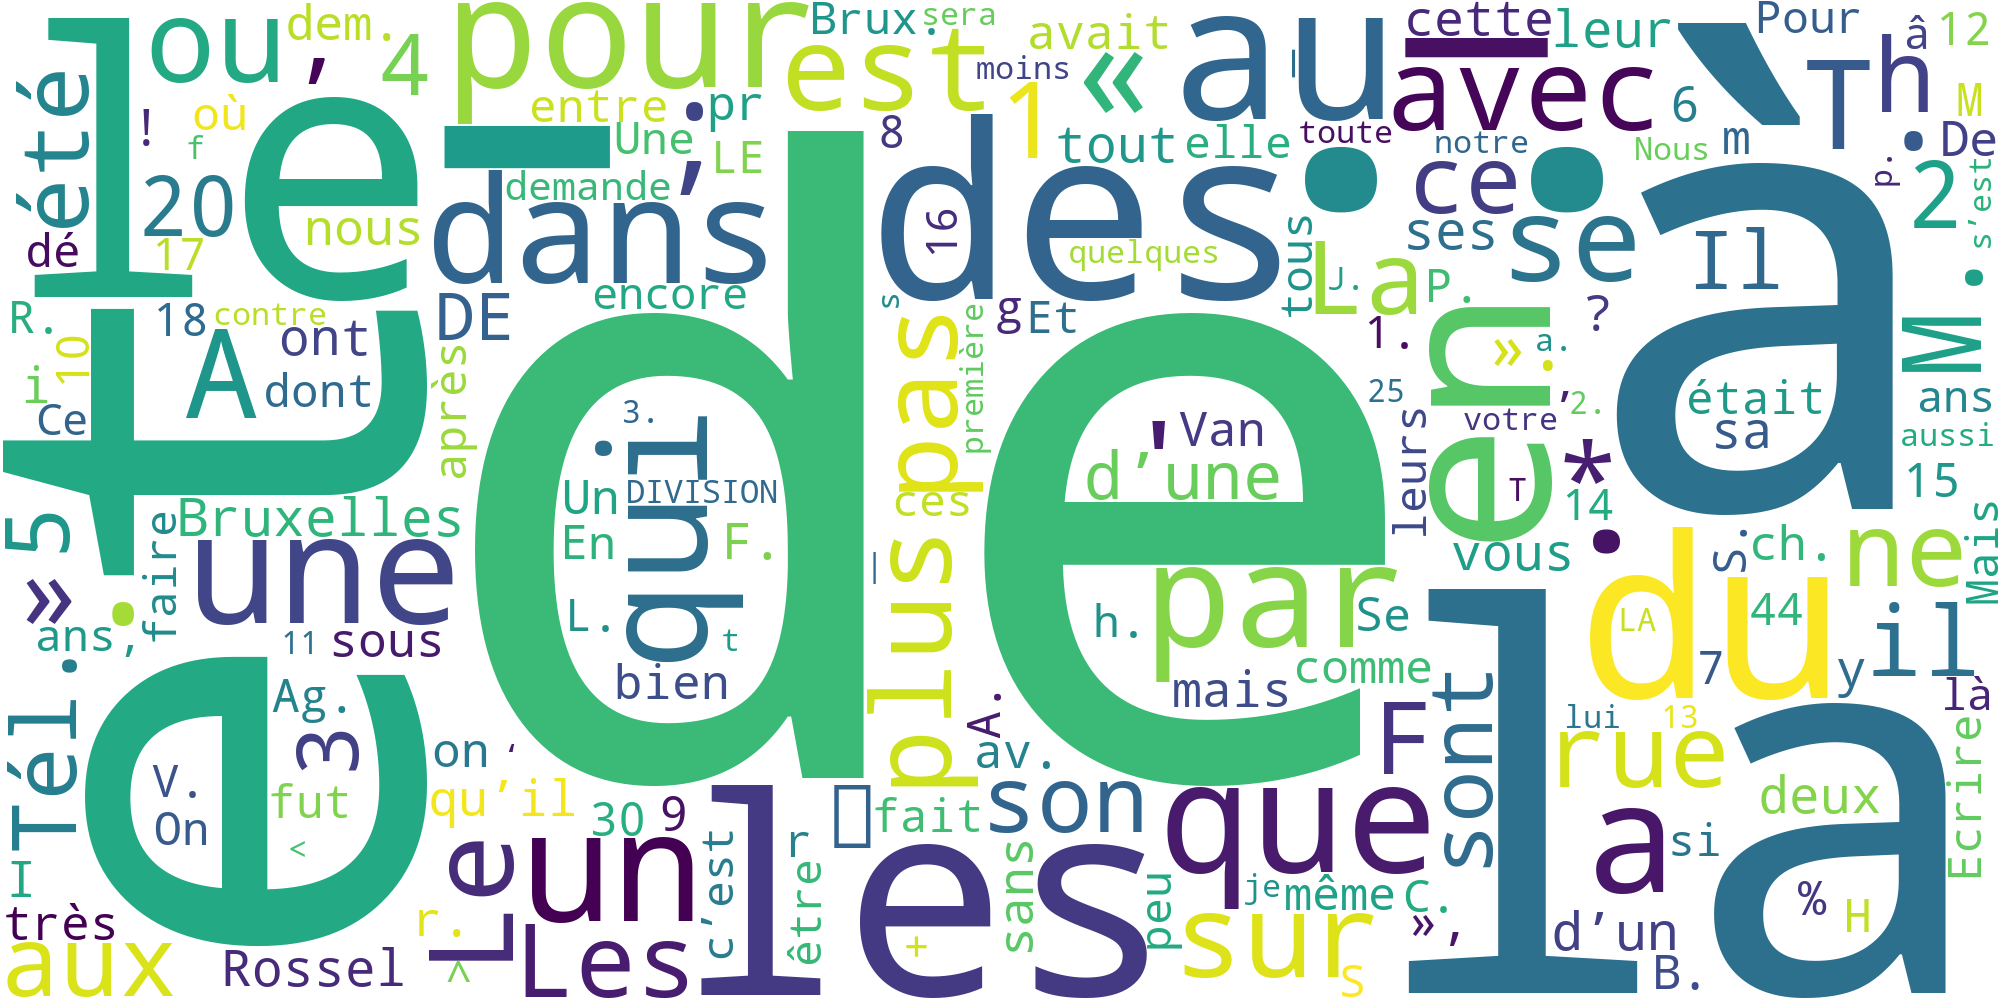

In [24]:
# Défini le chemin pour sauvegarder
temp_path = "output"   # dossier "output" dans le projet

# Crée le dossier s'il n'existe pas
os.makedirs(temp_path, exist_ok=True)

year = 1965  


wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=sw).generate_from_frequencies(filtered_frequencies)
path = f"output/{year}.png"
cloud.to_file(path)

Image(filename=path)

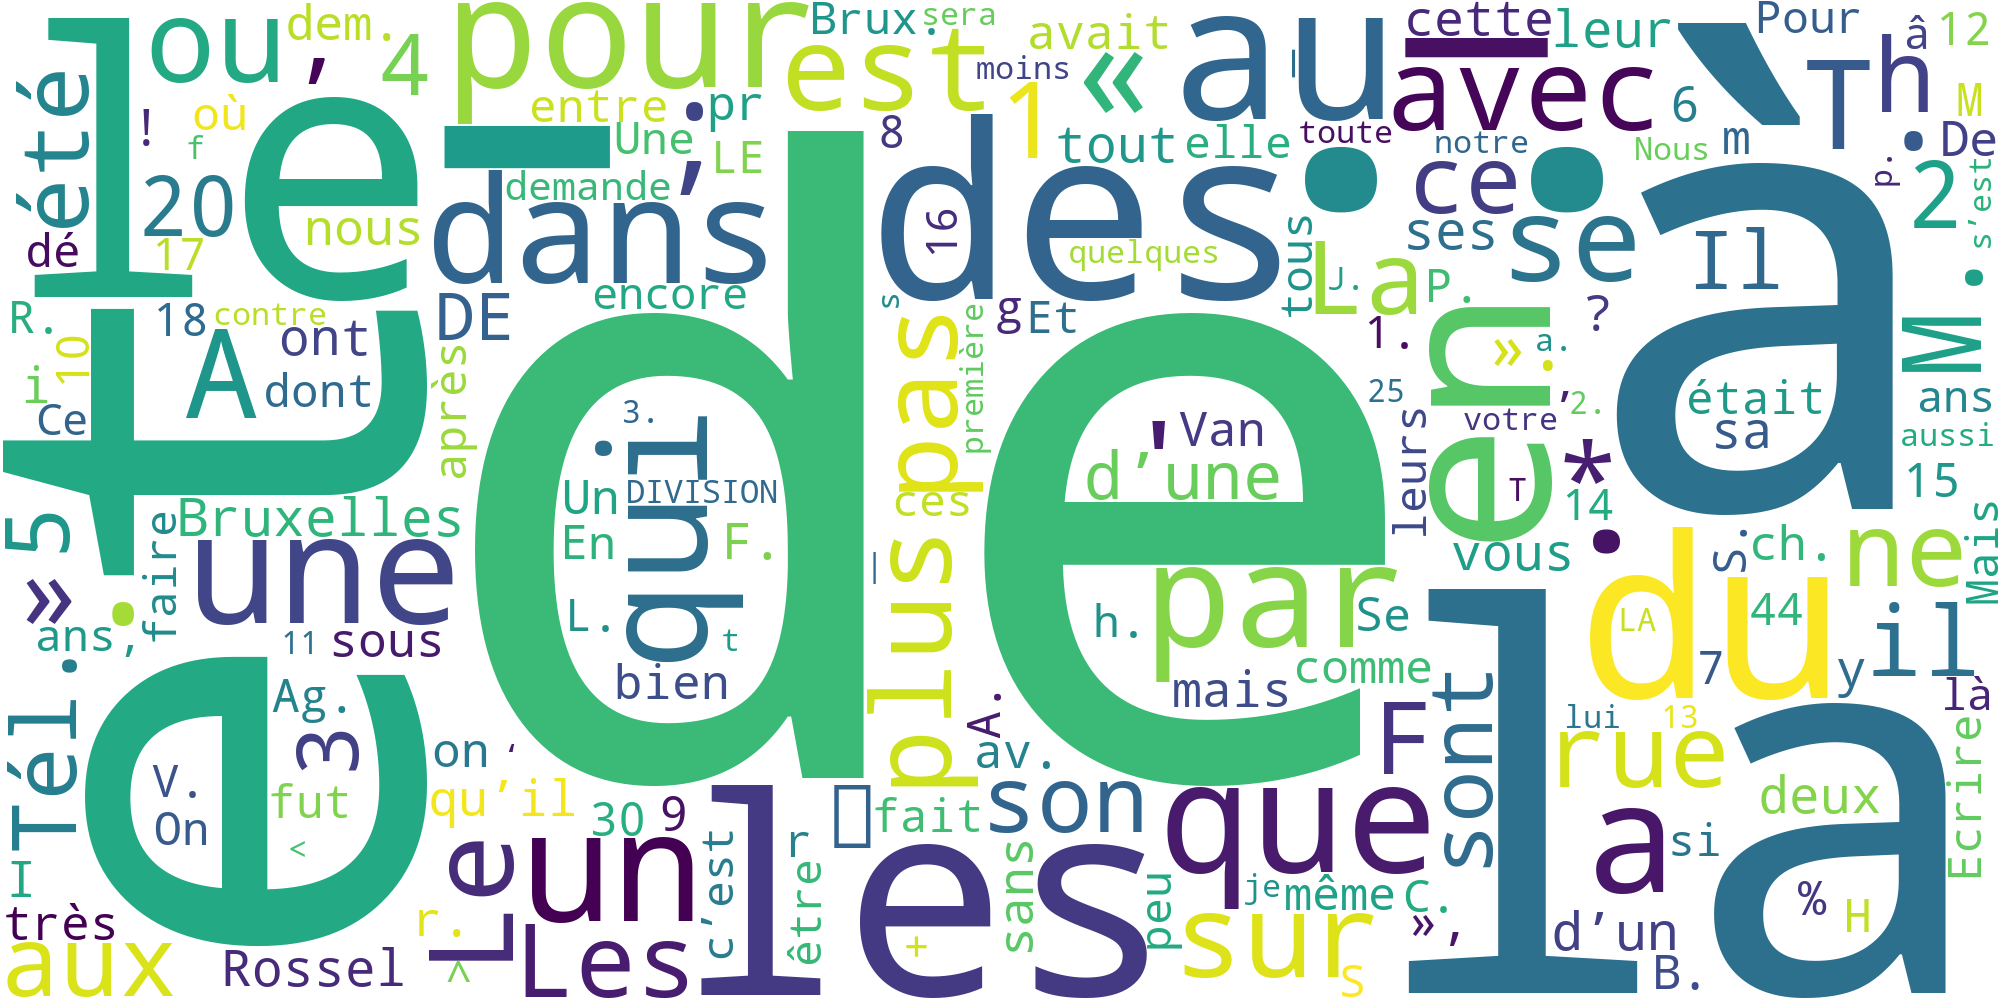

In [13]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

5. Trouver les entités nommées principales (personnes, organisations et lieux) pertinentes pour année 1965.
Utilisation de Spacy pour l'extraction des entités nommées.

In [49]:
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences
!pip install  fr_core_news_md
import os
print(os.getcwd())


c:\Users\aspng\ULB_TAC\tac\module3\tp2Requirement already satisfied: fr_core_news_md in c:\users\aspng\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (3.8.0)




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\aspng\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [50]:
#Configuration et chargement du modèle Spacy pour le français
nlp = spacy.load('fr_core_news_md')

In [51]:
# Préparation du texte source de 1965
file_path = "C:/Users/aspng/ULB_TAC/tac/data/tmp/1965.txt"
try:
    with open(file_path, "r", encoding="utf-8") as f:
        text_1965 = f.read()
except FileNotFoundError:
    print(f"Erreur: Le fichier {file_path} n'a pas été trouvé.")
    exit()
    
except Exception as e:
    print(f"Erreur lors de la lecture du fichier: {e}")
    exit()

In [53]:
absolute_path = r"C:\Temp\1965.txt"

In [57]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 43.4 s
Wall time: 47.3 s


In [62]:
entities = {
    "PER": defaultdict(int),
    "ORG": defaultdict(int),
    "LOC": defaultdict(int)
}

In [63]:
for ent in doc.ents:
    if ent.label_ in ["PER", "ORG", "LOC"] and len(ent.text) > 3:
        entities[ent.label_][ent.text] += 1

# Afficher les résultats pour chaque catégorie
for entity_type in ["PER", "ORG", "LOC"]:
    print(f"\n--- Entités {entity_type} (Top 50) ---")
    sorted_entities = sorted(
        entities[entity_type].items(),
        key=lambda kv: kv[1],
        reverse=True
    )[:50]
    
    for entity, freq in sorted_entities:
        print(f"{entity} : {freq} occurrences")


--- Entités PER (Top 50) ---
Rossel : 65 occurrences
Coach : 36 occurrences
SENT : 35 occurrences
- Tél : 20 occurrences
Bonne : 15 occurrences
curr : 14 occurrences
P. L. P. : 14 occurrences
Joël Robert : 13 occurrences
Ecrire Ag : 12 occurrences
Louise : 11 occurrences
inch : 10 occurrences
F. T. : 10 occurrences
A.F.P. : 9 occurrences
Elisabethville : 9 occurrences
curric : 9 occurrences
Monsieur : 9 occurrences
Agence Rossel : 8 occurrences
Valentine : 8 occurrences
Isabelle : 8 occurrences
Johnson : 7 occurrences
atel : 7 occurrences
Ambroise : 7 occurrences
trav : 7 occurrences
Mozart : 7 occurrences
Volume D.153 : 7 occurrences
Jobard : 7 occurrences
Tvardovski : 7 occurrences
M. Wilson : 7 occurrences
Philippe : 7 occurrences
Archie : 6 occurrences
Sanford : 6 occurrences
Ecrire : 6 occurrences
Van Volxem : 6 occurrences
Arbitres : 6 occurrences
Président : 6 occurrences
F. Tél : 6 occurrences
Staline : 6 occurrences
Dominique : 6 occurrences
Francis : 6 occurrences
Jacques : 

In [66]:
pip install Blobber

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: Blobber in c:\users\aspng\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (1.0)




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\aspng\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [67]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\aspng\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [68]:
pip install PatternTaggger

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PatternTaggger (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\aspng\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for PatternTaggger


In [69]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [70]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

6. Sélection arbitraire de 10 phrases dans les articles de l’année 1965 et analyse de sentiments. Résume des résultats dans un tableau indiquant leur polarité et leur subjectivité.

#Le Soir du mercredi 6 janvier 1965

1. La compagnie Alcan Aluminium Corp., une dés filliales de Aluminium Ltd , a également été inculpée, dans cette affaire qui sera évoquée devant un tribunal fédéral de Newàrk, dans le New Jersey. 

2. La division de National Distillers, que la firme canadienne avait l’intention d’acquérir, a pour raison sociale Bridgeport Brass Co.

3. Parmi ses principales productions figurent les matériaux de construction tels que les huisseries, des stores vénitiens et les stores en aluminium. 

4. Les comptes de clôture seront présentés prochainement aux commissaires. 

5. La situation comptable arrêtée au 15 décembre dernier fait état d’un solde à répartir de 2.645,496 francs, qui permet notamment un remboursement final de 205,46 F à chacune des 9.900 parts sociales. 

6. Cette opération était prévue pour le 5 janvier.

7. Au marché libre, le dollar passe à 49.70 - 75 contre 49.68.

8. Certaines offres sont attribuées à des ventes d’investisseurs qui ont réalisé des profits à long terme sur diverses valeurs et qui avaient attendu 1965 pour dégager leurs gains pour des raisons fiscales.

9. La clôture est soutenue. 

10. L’électricité augmentera de 34 %, le gaz de 30 %, l’essence de 20 %, les chemins de fer de 50 %. 

In [71]:
get_sentiment("La compagnie Alcan Aluminium Corp., une dés filliales de Aluminium Ltd , a également été inculpée, dans cette affaire qui sera évoquée devant un tribunal fédéral de Newàrk, dans le New Jersey.")

This text is 10% positive and 18% subjective.


In [72]:
get_sentiment("La division de National Distillers, que la firme canadienne avait l’intention d’acquérir, a pour raison sociale Bridgeport Brass Co.")

This text is 12% positive and 5% subjective.


In [73]:
get_sentiment("Parmi ses principales productions figurent les matériaux de construction tels que les huisseries, des stores vénitiens et les stores en aluminium.")

This text is 10% positive and 10% subjective.


In [74]:
get_sentiment("Les comptes de clôture seront présentés prochainement aux commissaires.")

This text is neutral and perfectly objective.


In [75]:
get_sentiment(" La situation comptable arrêtée au 15 décembre dernier fait état d’un solde à répartir de 2.645,496 francs, qui permet notamment un remboursement final de 205,46 F à chacune des 9.900 parts sociales. ")

This text is 9% negative and 15% subjective.


In [76]:
get_sentiment("Cette opération était prévue pour le 5 janvier.")

This text is neutral and perfectly objective.


In [77]:
get_sentiment("Au marché libre, le dollar passe à 49.70 - 75 contre 49.68.")

This text is 45% positive and 30% subjective.


In [78]:
get_sentiment(" Certaines offres sont attribuées à des ventes d’investisseurs qui ont réalisé des profits à long terme sur diverses valeurs et qui avaient attendu 1965 pour dégager leurs gains pour des raisons fiscales.")

This text is 4% negative and 12% subjective.


In [79]:
get_sentiment("La clôture est soutenue. ")

This text is neutral and perfectly objective.


In [80]:
get_sentiment("L’électricité augmentera de 34 %, le gaz de 30 %, l’essence de 20 %, les chemins de fer de 50 %.")

This text is neutral and perfectly objective.


In [86]:
import pandas as pd
data = {
    'ID': ['Sentence 1', 'Sentence 2', 'Sentence 3', 'Sentence 4', 'Sentence 5', 'Sentence 6', 'Sentence 7', 'Sentence 8', 'Sentence 9', 'Sentence 10'],
    'Polarity': ['10% positive', '12% positive', '10% positive', 'neutral', '9% negative', 'neutral', '45%positive', '4% negative', 'neutral', 'neutral'],
    'Subjectivity': ['18% subjective', '5% subjective', '10% subjective', 'perfectly objective', '15% subjective', 'perfectly objective', '30% subjective', '12% subjective', 'perfectly objective', 'perfectly objective']
}
df = pd.DataFrame(data)
print(df)

            ID      Polarity         Subjectivity
0   Sentence 1  10% positive       18% subjective
1   Sentence 2  12% positive        5% subjective
2   Sentence 3  10% positive       10% subjective
3   Sentence 4       neutral  perfectly objective
4   Sentence 5   9% negative       15% subjective
5   Sentence 6       neutral  perfectly objective
6   Sentence 7   45%positive       30% subjective
7   Sentence 8   4% negative       12% subjective
8   Sentence 9       neutral  perfectly objective
9  Sentence 10       neutral  perfectly objective
